In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    # Importing Libraries
import seaborn as sns
%matplotlib inline

# A) Mathematics Dataset

## 1) Loading dataset into DataFrame

In [2]:
df=pd.read_csv('student-mat.csv', sep=';')        # Loading Dataset 

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.isnull().sum()     # Checking for null values

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## 2) Checking dtype of each columns

In [5]:
df.info()            # Checking data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## 3) Exploring the range of values

In [6]:
df.describe()    # Stats of columns

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [7]:
for i in df.select_dtypes(include='object'):
    print(df[i].value_counts())

GP    349
MS     46
Name: school, dtype: int64
F    208
M    187
Name: sex, dtype: int64
U    307
R     88
Name: address, dtype: int64
GT3    281
LE3    114
Name: famsize, dtype: int64
T    354
A     41
Name: Pstatus, dtype: int64
other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64
other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64
course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64
mother    273
father     90
other      32
Name: guardian, dtype: int64
no     344
yes     51
Name: schoolsup, dtype: int64
yes    242
no     153
Name: famsup, dtype: int64
no     214
yes    181
Name: paid, dtype: int64
yes    201
no     194
Name: activities, dtype: int64
yes    314
no      81
Name: nursery, dtype: int64
yes    375
no      20
Name: higher, dtype: int64
yes    329
no      66
Name: internet, dtype: int64
no     263
yes    132
Name: romantic, 

In [8]:
for i in df.columns:
    print(i,':',df[i].unique(),',',len(df[i].unique()))

school : ['GP' 'MS'] , 2
sex : ['F' 'M'] , 2
age : [18 17 15 16 19 22 20 21] , 8
address : ['U' 'R'] , 2
famsize : ['GT3' 'LE3'] , 2
Pstatus : ['A' 'T'] , 2
Medu : [4 1 3 2 0] , 5
Fedu : [4 1 2 3 0] , 5
Mjob : ['at_home' 'health' 'other' 'services' 'teacher'] , 5
Fjob : ['teacher' 'other' 'services' 'health' 'at_home'] , 5
reason : ['course' 'other' 'home' 'reputation'] , 4
guardian : ['mother' 'father' 'other'] , 3
traveltime : [2 1 3 4] , 4
studytime : [2 3 1 4] , 4
failures : [0 3 2 1] , 4
schoolsup : ['yes' 'no'] , 2
famsup : ['no' 'yes'] , 2
paid : ['no' 'yes'] , 2
activities : ['no' 'yes'] , 2
nursery : ['yes' 'no'] , 2
higher : ['yes' 'no'] , 2
internet : ['no' 'yes'] , 2
romantic : ['no' 'yes'] , 2
famrel : [4 5 3 1 2] , 5
freetime : [3 2 4 1 5] , 5
goout : [4 3 2 1 5] , 5
Dalc : [1 2 5 3 4] , 5
Walc : [1 3 2 4 5] , 5
health : [3 5 1 2 4] , 5
absences : [ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17] , 34
G1 : [ 5  7 15  

### 4) Exploring distribution of each columns

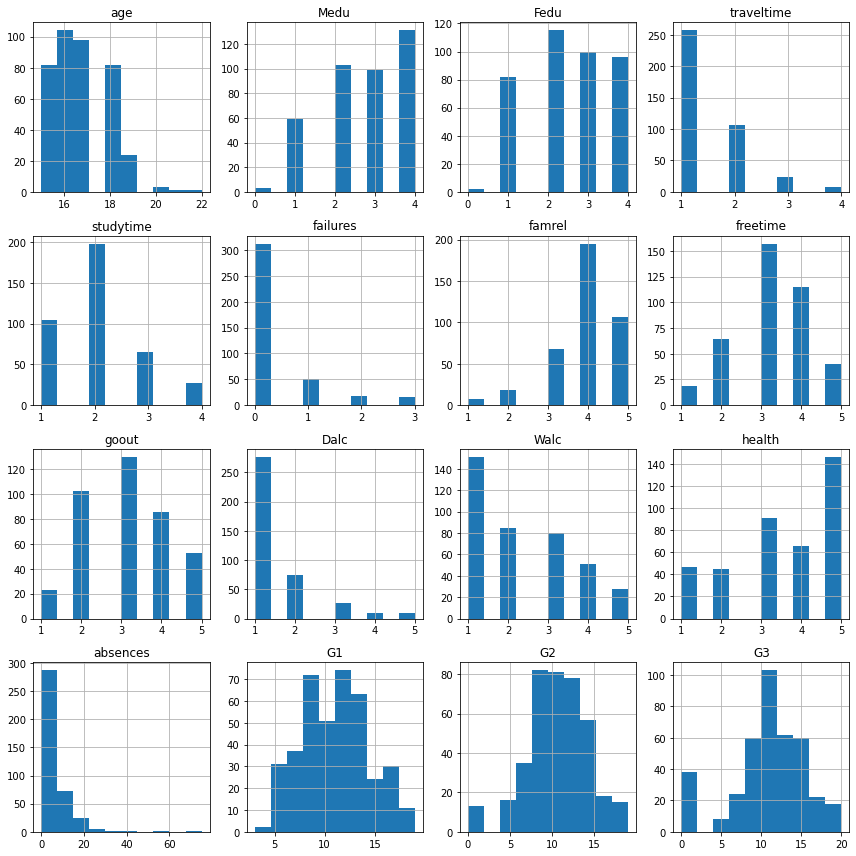

In [9]:
df.hist(figsize=(12,12))
plt.tight_layout()          # Histograms for numeric values
plt.show()

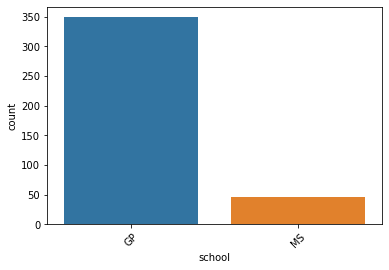

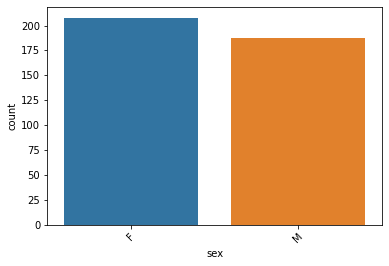

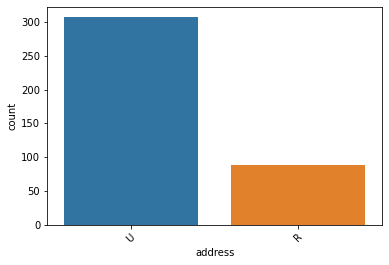

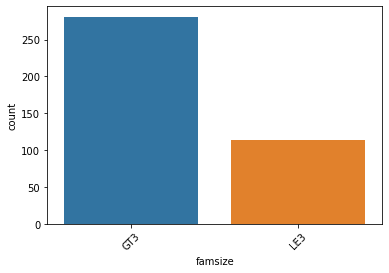

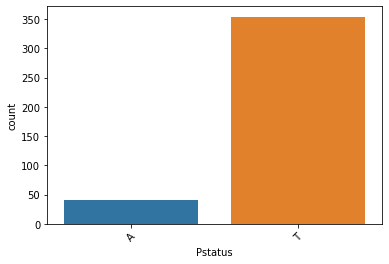

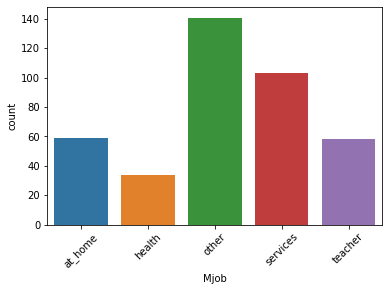

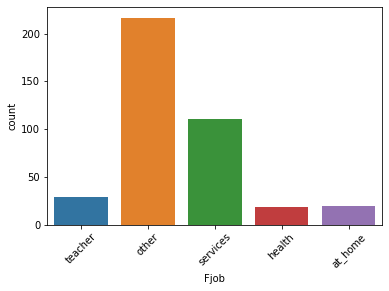

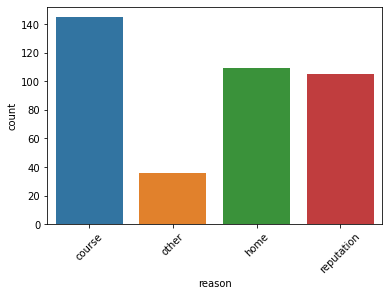

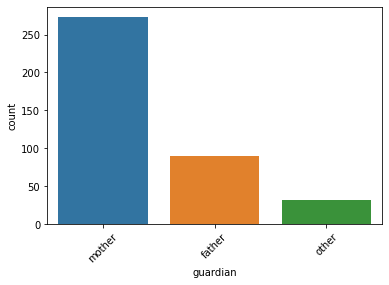

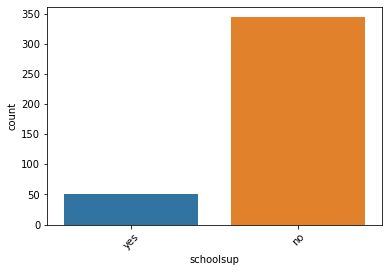

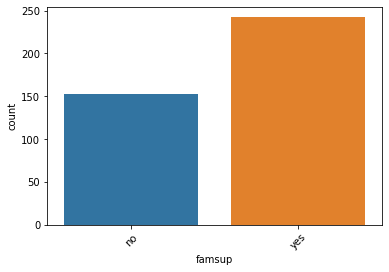

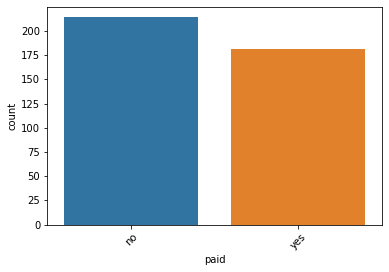

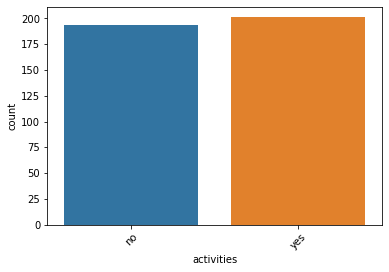

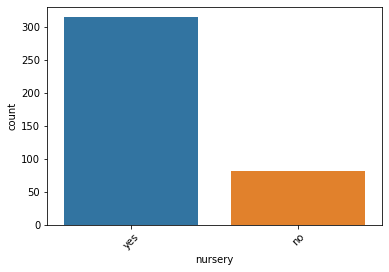

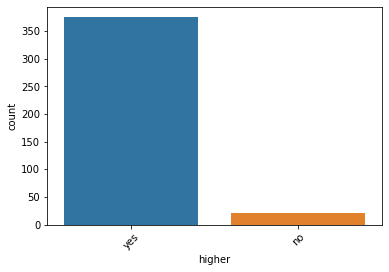

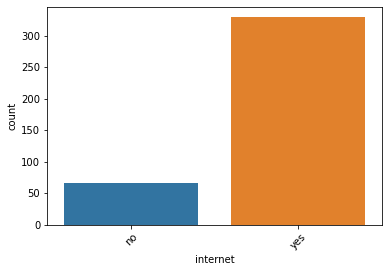

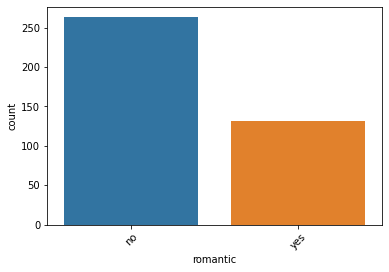

In [10]:
for i in df.select_dtypes(include='object'):
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=i)                   # Categorical distribution 
    plt.xticks(rotation=45)
    plt.show()

## 5) Exploring columns using correlation matrix

In [11]:
correlation_mat = df.corr()  
correlation_mat.style.background_gradient (cmap = 'BrBG')

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


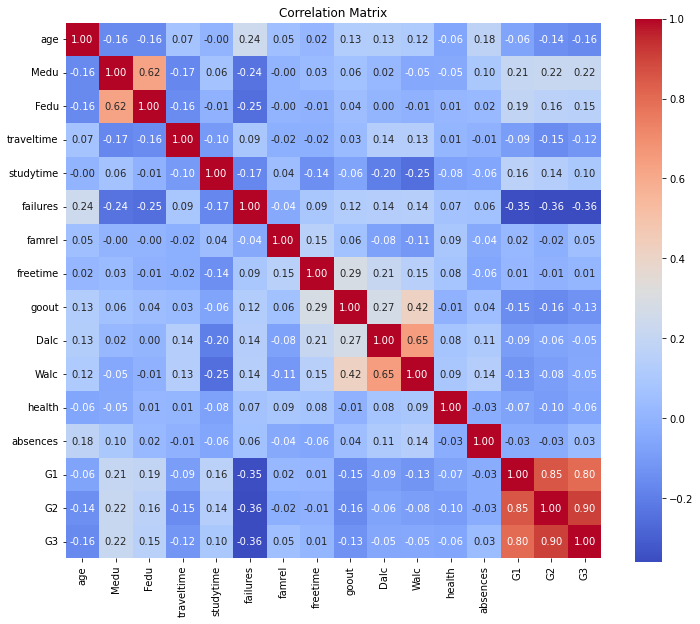

In [12]:
numeric_col = ['age', 'Medu','Fedu', 'traveltime','studytime', 'failures','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','G3']
correlation_mat = df[numeric_col].corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation_mat, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

## 6) Ranking all the features to determine overall grade

In [13]:
matrix  = df.corr()
mat_rank = matrix['G3'].sort_values(ascending = False)
print(mat_rank)

G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
studytime     0.097820
famrel        0.051363
absences      0.034247
freetime      0.011307
Walc         -0.051939
Dalc         -0.054660
health       -0.061335
traveltime   -0.117142
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64


## B) Portuguese Dataset

## 1) Loading dataset into DataFrame

In [14]:
df_ = pd.read_csv('student-por.csv', sep=';')  

In [15]:
df_.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [16]:
df_.isnull().sum()      # Checking for null values

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## 2) Checking data type of each column

In [17]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

## 3) Exploring the range of values

In [18]:
df_.describe()     # Checking stats

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [19]:
for i in df_.select_dtypes(include='object'):
    print(df_[i].value_counts())

GP    423
MS    226
Name: school, dtype: int64
F    383
M    266
Name: sex, dtype: int64
U    452
R    197
Name: address, dtype: int64
GT3    457
LE3    192
Name: famsize, dtype: int64
T    569
A     80
Name: Pstatus, dtype: int64
other       258
services    136
at_home     135
teacher      72
health       48
Name: Mjob, dtype: int64
other       367
services    181
at_home      42
teacher      36
health       23
Name: Fjob, dtype: int64
course        285
home          149
reputation    143
other          72
Name: reason, dtype: int64
mother    455
father    153
other      41
Name: guardian, dtype: int64
no     581
yes     68
Name: schoolsup, dtype: int64
yes    398
no     251
Name: famsup, dtype: int64
no     610
yes     39
Name: paid, dtype: int64
no     334
yes    315
Name: activities, dtype: int64
yes    521
no     128
Name: nursery, dtype: int64
yes    580
no      69
Name: higher, dtype: int64
yes    498
no     151
Name: internet, dtype: int64
no     410
yes    239
Name: romantic, 

In [20]:
for i in df_.columns:
    print(i,':',df_[i].unique(),',',len(df_[i].unique()))

school : ['GP' 'MS'] , 2
sex : ['F' 'M'] , 2
age : [18 17 15 16 19 22 20 21] , 8
address : ['U' 'R'] , 2
famsize : ['GT3' 'LE3'] , 2
Pstatus : ['A' 'T'] , 2
Medu : [4 1 3 2 0] , 5
Fedu : [4 1 2 3 0] , 5
Mjob : ['at_home' 'health' 'other' 'services' 'teacher'] , 5
Fjob : ['teacher' 'other' 'services' 'health' 'at_home'] , 5
reason : ['course' 'other' 'home' 'reputation'] , 4
guardian : ['mother' 'father' 'other'] , 3
traveltime : [2 1 3 4] , 4
studytime : [2 3 1 4] , 4
failures : [0 3 1 2] , 4
schoolsup : ['yes' 'no'] , 2
famsup : ['no' 'yes'] , 2
paid : ['no' 'yes'] , 2
activities : ['no' 'yes'] , 2
nursery : ['yes' 'no'] , 2
higher : ['yes' 'no'] , 2
internet : ['no' 'yes'] , 2
romantic : ['no' 'yes'] , 2
famrel : [4 5 3 1 2] , 5
freetime : [3 2 4 1 5] , 5
goout : [4 3 2 1 5] , 5
Dalc : [1 2 5 3 4] , 5
Walc : [1 3 2 4 5] , 5
health : [3 5 1 2 4] , 5
absences : [ 4  2  6  0 10  8 16 14  1 12 24 22 32 30 21 15  9 18 26  7 11  5 13  3] , 24
G1 : [ 0  9 12 14 11 13 10 15 17  8 16 18  7  6

## 4) Exploring distributions of each column

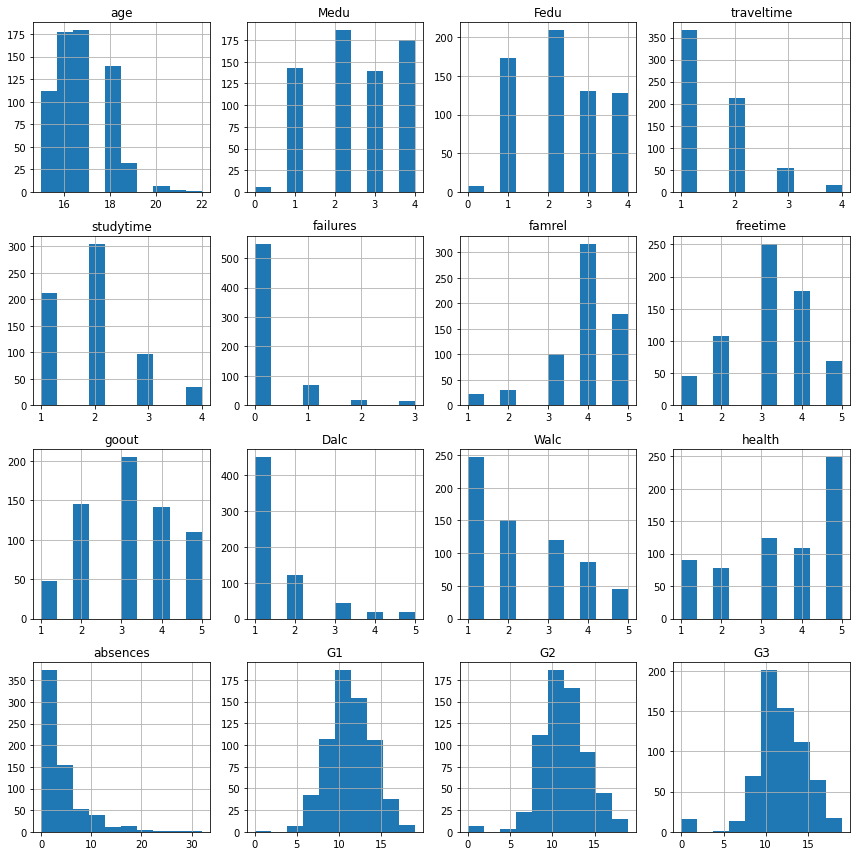

In [21]:
df_.hist(figsize=(12,12))
plt.tight_layout()          # Histograms for numeric values
plt.show()

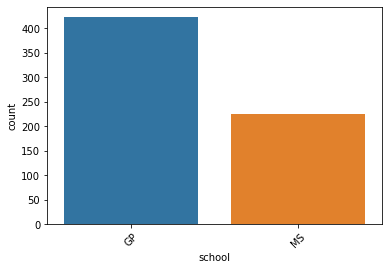

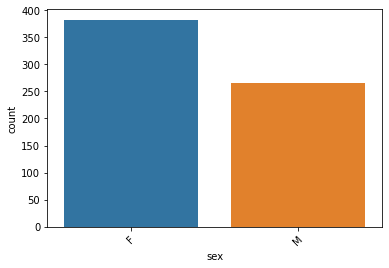

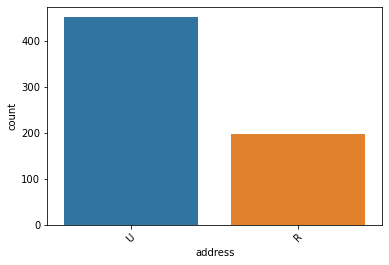

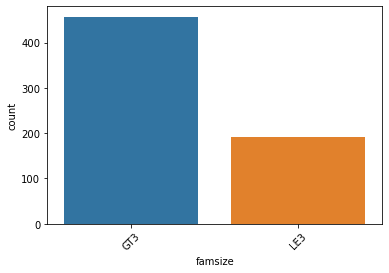

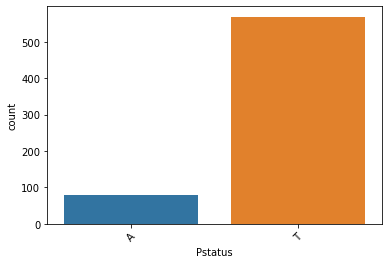

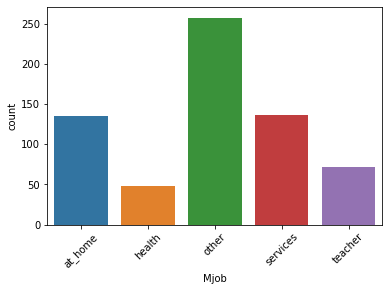

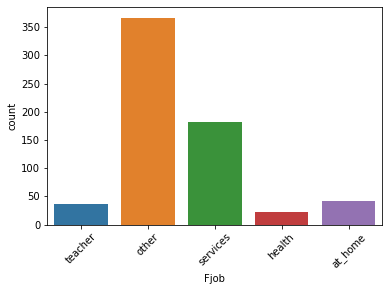

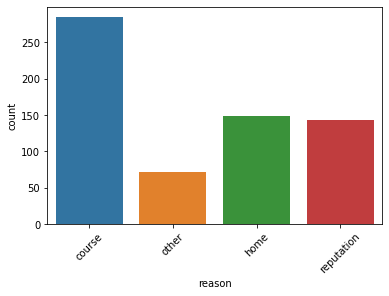

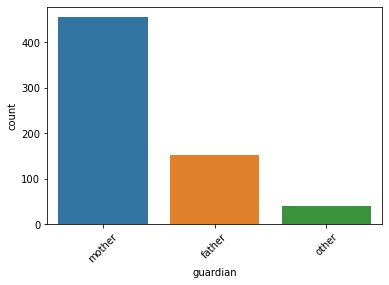

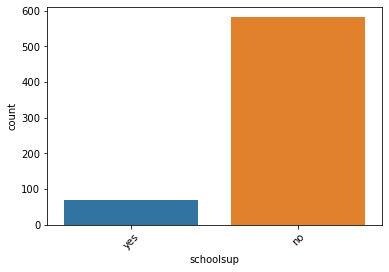

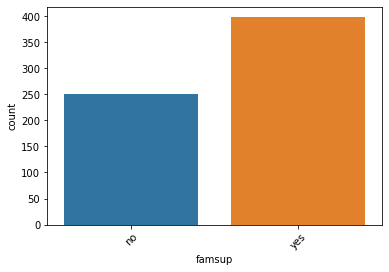

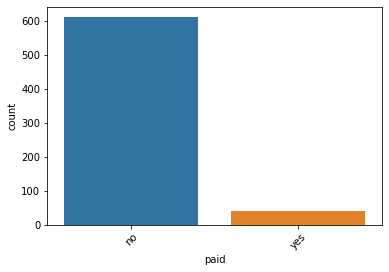

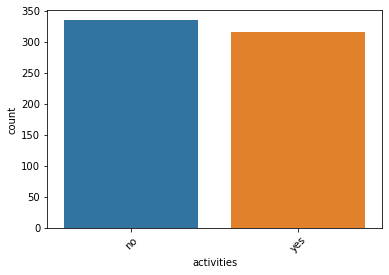

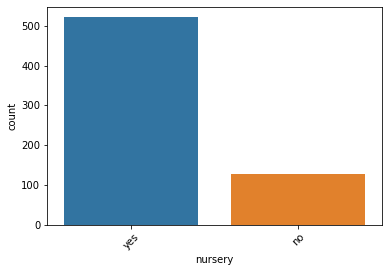

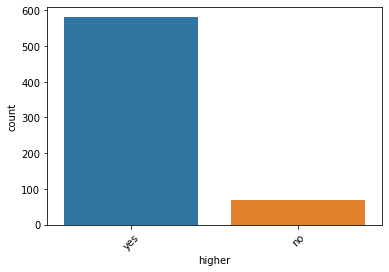

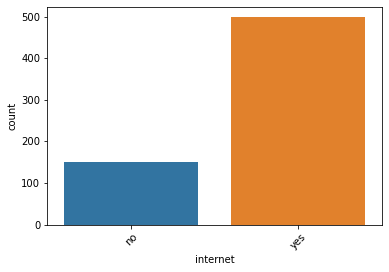

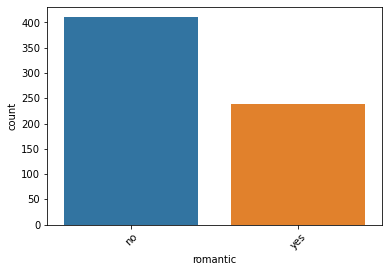

In [22]:
for i in df_.select_dtypes(include='object'):
    plt.figure(figsize=(6,4))
    sns.countplot(data=df_, x=i)                   # Categorical distribution 
    plt.xticks(rotation=45)
    plt.show()

## 5) Exploring columns using correlation matrix

In [23]:
correlation_mat = df_.corr()  
correlation_mat.style.background_gradient (cmap = 'BrBG')

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.107832,-0.121050,0.034490,-0.008415,0.319968,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119,-0.106505
Medu,-0.107832,1.000000,0.647477,-0.265079,0.097006,-0.172210,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035,0.240151
Fedu,-0.121050,0.647477,1.000000,-0.208288,0.050400,-0.165915,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139,0.211800
traveltime,0.034490,-0.265079,-0.208288,1.000000,-0.063154,0.097730,-0.009521,0.000937,0.057454,0.092824,0.057007,-0.048261,-0.008149,-0.154120,-0.154489,-0.127173
studytime,-0.008415,0.097006,0.050400,-0.063154,1.000000,-0.147441,-0.004127,-0.068829,-0.075442,-0.137585,-0.214925,-0.056433,-0.118389,0.260875,0.240498,0.249789
failures,0.319968,-0.172210,-0.165915,0.097730,-0.147441,1.000000,-0.062645,0.108995,0.045078,0.105949,0.082266,0.035588,0.122779,-0.384210,-0.385782,-0.393316
famrel,-0.020559,0.024421,0.020256,-0.009521,-0.004127,-0.062645,1.000000,0.129216,0.089707,-0.075767,-0.093511,0.109559,-0.089534,0.048795,0.089588,0.063361
freetime,-0.004910,-0.019686,0.006841,0.000937,-0.068829,0.108995,0.129216,1.000000,0.346352,0.109904,0.120244,0.084526,-0.018716,-0.094497,-0.106678,-0.122705
goout,0.112805,0.009536,0.027690,0.057454,-0.075442,0.045078,0.089707,0.346352,1.000000,0.245126,0.388680,-0.015741,0.085374,-0.074053,-0.079469,-0.087641
Dalc,0.134768,-0.007018,0.000061,0.092824,-0.137585,0.105949,-0.075767,0.109904,0.245126,1.000000,0.616561,0.059067,0.172952,-0.195171,-0.189480,-0.204719


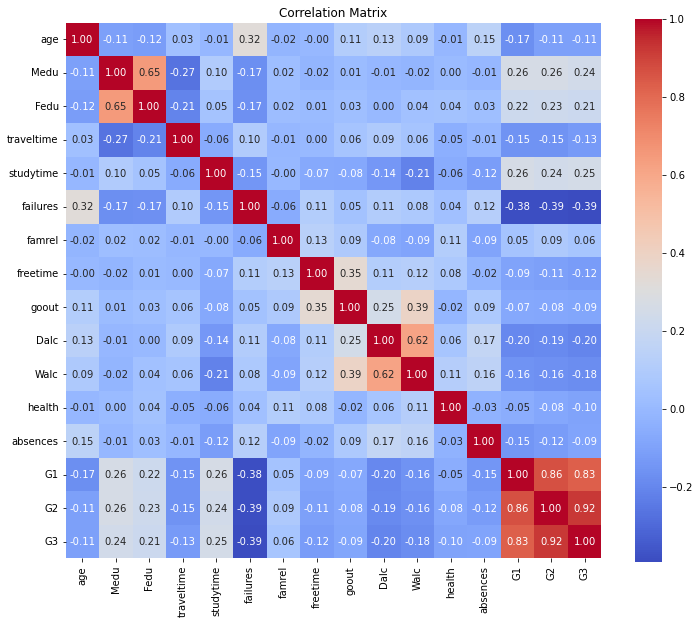

In [24]:
numeric_col = ['age', 'Medu','Fedu', 'traveltime','studytime', 'failures','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','G3']
correlation_mat = df_[numeric_col].corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation_mat, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

## 6) Ranking Features to determine overall grade

In [25]:
matrix  = df_.corr()
mat_rank = matrix['G3'].sort_values(ascending = False)
print(mat_rank)

G3            1.000000
G2            0.918548
G1            0.826387
studytime     0.249789
Medu          0.240151
Fedu          0.211800
famrel        0.063361
goout        -0.087641
absences     -0.091379
health       -0.098851
age          -0.106505
freetime     -0.122705
traveltime   -0.127173
Walc         -0.176619
Dalc         -0.204719
failures     -0.393316
Name: G3, dtype: float64
